<a href="https://colab.research.google.com/github/NorhanM-A/Shape-Detection-with-YOLO/blob/main/ShapeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.182 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Q3aYoueljqQ1S5nhgaYY")
project = rf.workspace("hku-uas-deprecated-sobt2").project("standard_object_shape")
dataset = project.version(2).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.182, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to standard_object_shape-2 in yolov8:: 100%|██████████| 44752/44752 [00:13<00:00, 3391.24it/s]


In [3]:
pip install matplotlib numpy


Exploring Training dataset:
Number of images: 19572
Number of labels (annotations): 19572


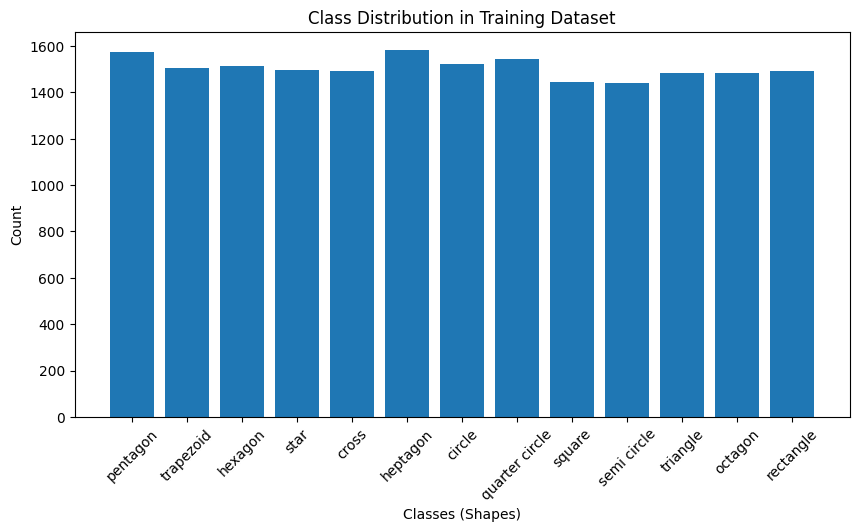

Exploring Testing dataset:
Number of images: 934
Number of labels (annotations): 934


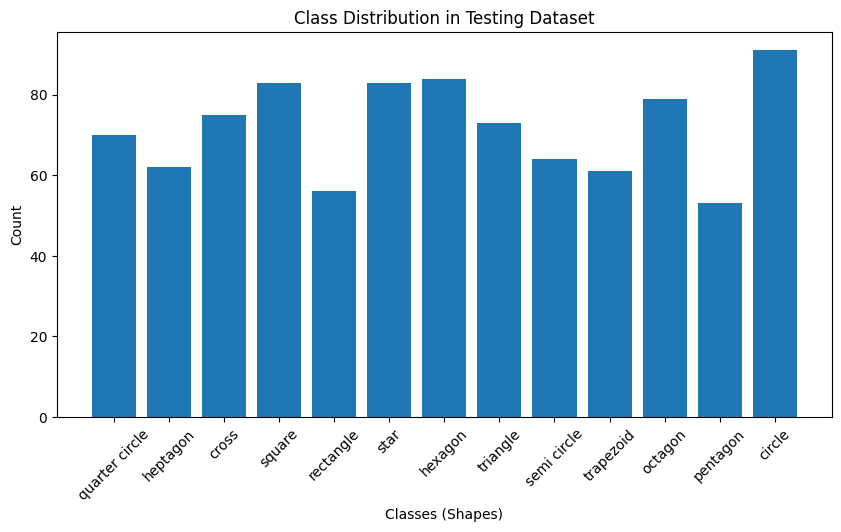

Exploring Validation dataset:
Number of images: 1864
Number of labels (annotations): 1864


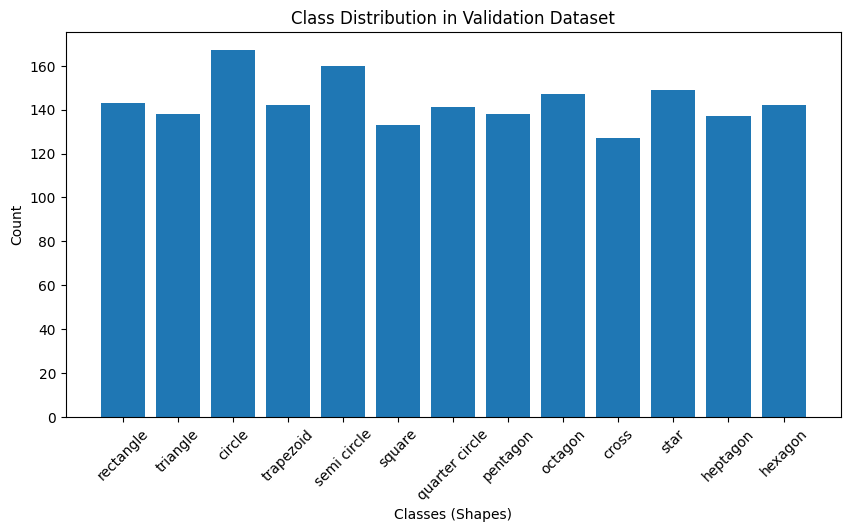

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to your dataset directories
train_dir = '/content/standard_object_shape-2/train'
test_dir = '/content/standard_object_shape-2/test'
val_dir = '/content/standard_object_shape-2/valid'

# Define a dictionary to map numeric labels to class names
class_mapping = {
    '0': 'circle',
    '1': 'cross',
    '2': 'heptagon',
    '3': 'hexagon',
    '4': 'octagon',
    '5': 'pentagon',
    '6': 'quarter circle',
    '7': 'rectangle',
    '8': 'semi circle',
    '9': 'square',
    '10': 'star',
    '11': 'trapezoid',
    '12': 'triangle'
    # Add more class mappings as needed
}

# Function to load and explore data
def explore_dataset(dataset_dir, dataset_name):
    num_images = len(os.listdir(os.path.join(dataset_dir, 'images')))
    num_labels = len(os.listdir(os.path.join(dataset_dir, 'labels')))

    print(f"Exploring {dataset_name} dataset:")
    print(f"Number of images: {num_images}")
    print(f"Number of labels (annotations): {num_labels}")

    # Calculate distribution of classes (shapes) using class names
    class_counts = {}
    for label_file in os.listdir(os.path.join(dataset_dir, 'labels')):
        with open(os.path.join(dataset_dir, 'labels', label_file), 'r') as label_file:
            for line in label_file:
                class_name = line.strip().split()[0]
                class_label = class_mapping.get(class_name, class_name)  # Get class name from mapping or use the label itself
                if class_label in class_counts:
                    class_counts[class_label] += 1
                else:
                    class_counts[class_label] = 1

    # Plot a histogram of class distribution
    classes, counts = zip(*class_counts.items())
    plt.figure(figsize=(10, 5))
    plt.bar(classes, counts)
    plt.title(f'Class Distribution in {dataset_name} Dataset')
    plt.xlabel('Classes (Shapes)')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Explore each dataset
explore_dataset(train_dir, 'Training')
explore_dataset(test_dir, 'Testing')
explore_dataset(val_dir, 'Validation')


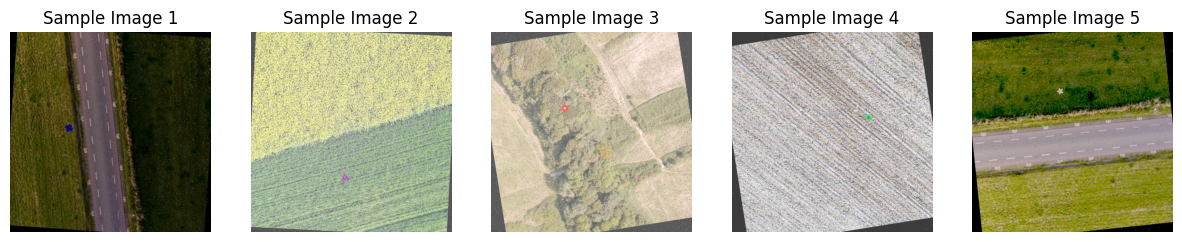

In [46]:
import cv2
import random

# Load and display random sample images
sample_images = random.sample(os.listdir(os.path.join(train_dir, 'images')), 5)  # Display 5 random images
plt.figure(figsize=(15, 5))
for i, image_filename in enumerate(sample_images):
    image = cv2.imread(os.path.join(train_dir, 'images', image_filename))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Sample Image {i+1}')
plt.show()


In [6]:
from ultralytics import YOLO

In [7]:
model= YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 110MB/s]


In [8]:
model.train(data="/content/standard_object_shape-2/data.yaml",epochs=3)

Ultralytics YOLOv8.0.182 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/standard_object_shape-2/data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ker

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d9f68a36920>
fitness: 0.5781305228086592
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.55617,     0.67232,     0.25755,     0.37503,     0.21963,     0.66706,     0.63316,     0.72991,     0.63355,     0.59556,     0.66073,     0.62117,     0.62295])
names: {0: 'CIRCLE', 1: 'CROSS', 2: 'HEPTAGON', 3: 'HEXAGON', 4: 'OCTAGON', 5: 'PENTAGON', 6: 'QUARTER_CIRCLE', 7: 'RECTANGLE', 8: 'SEMICIRCLE', 9: 'SQUARE', 10: 'STAR', 11: 'TRAPEZOID', 12: 'TRIANGLE'}
plot: True
results_dict: {'metrics/precision(B)': 0.594558098102416, 'metrics/recall(B)': 0.7969725036394644, 'metrics/mAP50(B)': 0.76567437196433, 'metrics/mAP50-95(B)': 0.557292317346918, 'fitness': 0.5781305228086592}


In [9]:
infer=YOLO("/content/runs/detect/train/weights/best.pt")

In [18]:
infer.predict("/content/standard_object_shape-2/test/images", save=True, save_txt=True)


image 1/934 /content/standard_object_shape-2/test/images/002d28e4-f8fd-4c2f-be5e-2491dbacb8bc_png.rf.83b047202a97a97a46e0d50ade50a8ac.jpg: 640x640 (no detections), 11.0ms
image 2/934 /content/standard_object_shape-2/test/images/004c3d14-3a64-4029-a3f0-50201d35337f_png.rf.6f381fd8035231c4f95d0523c425e64e.jpg: 640x640 1 HEPTAGON, 1 HEXAGON, 18.5ms
image 3/934 /content/standard_object_shape-2/test/images/007dcf85-6732-47a3-a45c-ffa7b5ffc523_png.rf.585c496c017a5abd038bb23e2ee1d0f8.jpg: 640x640 1 TRIANGLE, 9.3ms
image 4/934 /content/standard_object_shape-2/test/images/00b83793-ba0f-45aa-8830-4a6bc3315f60_png.rf.7b548b19cc967501fc36e44b0da78cb6.jpg: 640x640 1 CIRCLE, 10.1ms
image 5/934 /content/standard_object_shape-2/test/images/00d65515-321d-4cfe-ae9d-6e7c7410f610_png.rf.c725cd90bd0cea41a75bb7e8afcfc8c8.jpg: 640x640 1 STAR, 7.3ms
image 6/934 /content/standard_object_shape-2/test/images/00eca2fe-bf96-4b69-af3f-cac48dc39e94_png.rf.8c8585a4c2b4f7571492108328ac53fc.jpg: 640x640 1 HEPTAGON, 1 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'CIRCLE', 1: 'CROSS', 2: 'HEPTAGON', 3: 'HEXAGON', 4: 'OCTAGON', 5: 'PENTAGON', 6: 'QUARTER_CIRCLE', 7: 'RECTANGLE', 8: 'SEMICIRCLE', 9: 'SQUARE', 10: 'STAR', 11: 'TRAPEZOID', 12: 'TRIANGLE'}
 orig_img: array([[[ 80, 123, 142],
         [ 76, 119, 138],
         [ 77, 120, 139],
         ...,
         [ 13,  20,  23],
         [  9,  18,  21],
         [  5,  17,  19]],
 
        [[ 62, 105, 124],
         [ 65, 108, 127],
         [ 72, 115, 134],
         ...,
         [  9,  18,  21],
         [  9,  21,  23],
         [  9,  22,  24]],
 
        [[ 53,  97, 114],
         [ 60, 104, 121],
         [ 71, 115, 132],
         ...,
         [  7,  19,  21],
         [  5,  20,  22],
         [  3,  21,  22]],
 
        ...,
 
        [[ 66, 106, 135],
         [ 71, 111, 140],
         [ 94, 134, 163],
         ...,
         [ 96, 143, 